In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
train_df = pd.read_csv("./Data/train.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
datetime         207 non-null object
y                207 non-null int64
week             207 non-null object
soldout          207 non-null int64
name             207 non-null object
kcal             166 non-null float64
remarks          21 non-null object
event            14 non-null object
payday           10 non-null float64
weather          207 non-null object
precipitation    207 non-null object
temperature      207 non-null float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [3]:
train_df.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [4]:
train_df["weather"].unique().size

7

In [5]:
train_df["weather"].unique()

array(['快晴', '曇', '晴れ', '薄曇', '雨', '雪', '雷電'], dtype=object)

In [6]:
train_df["name"].unique().size

156

In [7]:
train_df["name"].unique()

array(['厚切りイカフライ', '手作りヒレカツ', '白身魚唐揚げ野菜あん', '若鶏ピリ辛焼', 'ビッグメンチカツ', '鶏の唐揚',
       '豚のスタミナ炒め', 'ボローニャ風カツ', 'ハンバーグ', 'タルタルinソーセージカツ', 'マーボ豆腐',
       '厚揚げ豚生姜炒め', 'クリームチーズ入りメンチ', '鶏のカッシュナッツ炒め', '手作りロースカツ',
       'ハンバーグデミソース', 'やわらかロースのサムジョン', '五目御飯', '肉じゃが', 'タンドリーチキン',
       'カキフライタルタル', '回鍋肉', 'ポーク味噌焼き', '鶏の唐揚げ甘酢あん', 'さっくりメンチカツ',
       '手ごね風ハンバーグ', '酢豚', 'カレー入りソーセージカツ', '豚肉の生姜焼', '鶏チリソース',
       '鶏の照り焼きマスタード', 'さんま辛味焼', 'カレイ唐揚げ野菜あんかけ', 'ジューシーメンチカツ', 'サバ焼味噌掛け',
       '手作りひれかつとカレー', '鶏のレモンペッパー焼orカレー', 'チンジャオロース', '海老フライタルタル',
       'チーズ入りメンチカツ', '鶏の唐揚げ', 'メダイ照り焼', 'ハンバーグカレーソース', 'さわら焼味噌掛け',
       '鶏のピリ辛焼き', 'ホタテクリ―ムシチュー', '鶏の唐揚げおろしソース', 'ますのマスタードソース', 'ロース甘味噌焼き',
       '海老フライとホタテ串カツ', 'ハンバーグ和風きのこソース', '酢豚orカレー', 'ポークハヤシ',
       '白身魚唐揚げ野菜あんかけ', '手作りひれかつ', 'メンチカツ', 'チキンクリームシチュー', '海老クリーミ―クノーデル',
       'ビーフカレー', 'カレイ野菜あんかけ', 'チーズ入りハンバーグ', '越冬キャベツのメンチカツ', '鶏の親子煮',
       '肉団子クリームシチュー', 'キーマカレー', '青椒肉絲', '和風ソースハンバーグ', '青梗菜牛肉炒め',
       '肉団子のシチュー', 'チキンカレー', 'ビーフトマト煮', 'ポーク生姜焼き', '牛丼風煮

In [8]:
train_df[train_df['payday']==1.0]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
16,2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1
31,2014-1-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,--,5.1
51,2014-2-10,137,月,0,鶏の唐揚げおろしソース,423.0,NaN,NaN,1.0,曇,--,7.8
70,2014-3-10,123,月,0,海老クリーミ―クノーデル,385.0,NaN,NaN,1.0,曇,--,7.6
92,2014-4-10,87,木,0,鶏の唐揚げおろしソース,362.0,NaN,NaN,1.0,晴れ,--,21.3
110,2014-5-9,58,金,1,手作りチキンカツ,434.0,NaN,NaN,1.0,晴れ,--,23.4
132,2014-6-10,56,火,0,カレイ唐揚げ野菜餡かけ,426.0,NaN,NaN,1.0,曇,--,25.5
154,2014-7-10,48,木,0,プルコギ,386.0,NaN,NaN,1.0,曇,--,28.8
174,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1
194,2014-9-10,54,水,0,ぶりレモンペッパー焼き,450.0,NaN,NaN,1.0,曇,0,25.0


In [9]:
#train_df[]
#train_df[train_df.apply(lambda x: x['day'] > 7 and x['day'] < 11 , axis=1)]
train_df['payday'] = train_df['payday'].fillna(0.0)
train_df

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,0.0,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,0.0,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,快晴,--,12.1


In [10]:
train_df['kcal_fill_median'] = train_df['kcal'].fillna(train_df['kcal'].median())
train_df['kcal_fill_mean'] = train_df['kcal'].fillna(train_df['kcal'].mean())
train_df

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,408.5,404.409639
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,408.5,404.409639
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,408.5,404.409639
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,408.5,404.409639
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,408.5,404.409639
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,0.0,曇,--,14.6,408.5,404.409639
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,快晴,--,17.9,408.5,404.409639
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,晴れ,--,14.7,408.5,404.409639
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,0.0,薄曇,--,17.7,408.5,404.409639
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,快晴,--,12.1,408.5,404.409639


In [11]:
train_df['precipitation'] = train_df['precipitation'].replace('--', '0').astype(float)
train_df

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,0.0,19.8,408.5,404.409639
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,0.0,17.0,408.5,404.409639
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,0.0,15.5,408.5,404.409639
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,0.0,15.2,408.5,404.409639
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,0.0,16.1,408.5,404.409639
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,0.0,曇,0.0,14.6,408.5,404.409639
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,快晴,0.0,17.9,408.5,404.409639
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,晴れ,0.0,14.7,408.5,404.409639
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,0.0,薄曇,0.0,17.7,408.5,404.409639
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,快晴,0.0,12.1,408.5,404.409639


In [12]:
# array(['快晴', '曇', '晴れ', '薄曇', '雨', '雪', '雷電'], dtype=object)
train_df['weather'] = train_df['weather'].map( {'快晴': 1.0, '晴れ': 2.0, 
                                                '薄曇': 3.0, '曇': 4.0,
                                                '雪': 5.0, '雨': 8.0, '雷電': 10.0
                                               } ).astype(float)
train_df

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,1.0,0.0,19.8,408.5,404.409639
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,1.0,0.0,17.0,408.5,404.409639
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,1.0,0.0,15.5,408.5,404.409639
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,1.0,0.0,15.2,408.5,404.409639
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,1.0,0.0,16.1,408.5,404.409639
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,0.0,4.0,0.0,14.6,408.5,404.409639
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,1.0,0.0,17.9,408.5,404.409639
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,2.0,0.0,14.7,408.5,404.409639
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,0.0,3.0,0.0,17.7,408.5,404.409639
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,1.0,0.0,12.1,408.5,404.409639


In [13]:
from my_modules.my_encoder import CategoryValueEncoder as CVE
from my_modules.my_encoder import TextValueEncoder as TVE
from my_modules.my_encoder import DateValueEncoder as DVE
from my_modules.my_encoder import NumericValueEncoder as NVE

train_df['datetime'] = pd.to_datetime(train_df['datetime'])
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['week'] = train_df['datetime'].dt.week
train_df['day'] = train_df['datetime'].dt.day
train_df['dayofweek'] = train_df['datetime'].dt.dayofweek

train_df['week'] = train_df['week'].apply(lambda x: x + 52 if x < 47 else x)

train_df.head(100)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean,year,month,day,dayofweek
0,2013-11-18,90,47,0,厚切りイカフライ,NaN,NaN,NaN,0.0,1.0,0.0,19.8,408.5,404.409639,2013,11,18,0
1,2013-11-19,101,47,1,手作りヒレカツ,NaN,NaN,NaN,0.0,1.0,0.0,17.0,408.5,404.409639,2013,11,19,1
2,2013-11-20,118,47,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,1.0,0.0,15.5,408.5,404.409639,2013,11,20,2
3,2013-11-21,120,47,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,1.0,0.0,15.2,408.5,404.409639,2013,11,21,3
4,2013-11-22,130,47,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,1.0,0.0,16.1,408.5,404.409639,2013,11,22,4
5,2013-11-25,135,48,1,鶏の唐揚,NaN,NaN,NaN,0.0,4.0,0.0,14.6,408.5,404.409639,2013,11,25,0
6,2013-11-26,145,48,0,豚のスタミナ炒め,NaN,NaN,NaN,0.0,1.0,0.0,17.9,408.5,404.409639,2013,11,26,1
7,2013-11-27,140,48,1,ボローニャ風カツ,NaN,NaN,NaN,0.0,2.0,0.0,14.7,408.5,404.409639,2013,11,27,2
8,2013-11-28,151,48,0,ハンバーグ,NaN,NaN,NaN,0.0,3.0,0.0,17.7,408.5,404.409639,2013,11,28,3
9,2013-11-29,116,48,0,タルタルinソーセージカツ,NaN,NaN,NaN,0.0,1.0,0.0,12.1,408.5,404.409639,2013,11,29,4


In [14]:
train_corr = train_df.corr()
train_corr

,y,week,soldout,kcal,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean,year,month,day,dayofweek
y,1.000000,-0.782993,0.098308,0.147269,0.046546,-0.158825,0.024257,-0.655332,0.142270,1.073266e-01,-5.750986e-01,0.010435,-0.068643,-0.089175
week,-0.782993,1.000000,-0.136302,-0.041299,-0.002766,0.212977,0.020260,0.820165,-0.057411,-3.155524e-02,6.152406e-01,0.141587,-0.004676,-0.021576
soldout,0.098308,-0.136302,1.000000,0.048633,-0.158202,0.190380,0.072960,-0.156752,0.038533,4.369753e-02,-1.193493e-02,-0.102884,-0.081096,-0.032651
kcal,0.147269,-0.041299,0.048633,1.000000,0.066765,0.054937,0.040185,-0.046191,1.000000,1.000000e+00,NaN,-0.047864,0.036490,0.055298
payday,0.046546,-0.002766,-0.158202,0.066765,1.000000,0.018201,-0.021757,-0.025759,0.059676,5.972031e-02,2.323187e-02,-0.016691,-0.167289,0.027586
weather,-0.158825,0.212977,0.190380,0.054937,0.018201,1.000000,0.357334,0.014364,0.038783,5.022796e-02,1.604137e-01,-0.000338,-0.062587,0.032437
precipitation,0.024257,0.020260,0.072960,0.040185,-0.021757,0.357334,1.000000,-0.050885,0.035805,3.998660e-02,4.678161e-02,-0.032903,-0.060412,0.091056
temperature,-0.655332,0.820165,-0.156752,-0.046191,-0.025759,0.014364,-0.050885,1.000000,-0.049230,-4.190471e-02,3.013310e-01,0.370592,0.018460,-0.026538
kcal_fill_median,0.142270,-0.057411,0.038533,1.000000,0.059676,0.038783,0.035805,-0.049230,1.000000,9.981387e-01,-4.853309e-02,0.003493,0.038767,0.060514
kcal_fill_mean,0.107327,-0.031555,0.043698,1.000000,0.059720,0.050228,0.039987,-0.041905,0.998139,1.000000e+00,-2.971713e-16,-0.033538,0.033117,0.047470


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


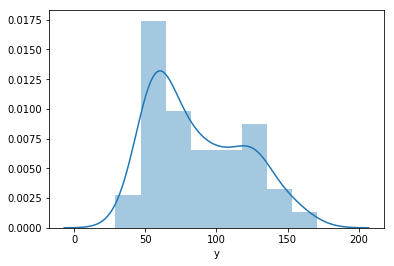

In [15]:
sns.distplot(train_df['y'])

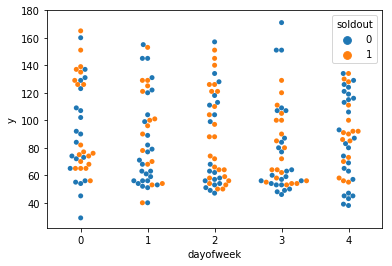

In [16]:
sns.swarmplot('dayofweek', 'y', hue="soldout", data=train_df)

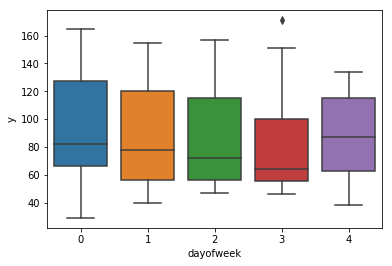

In [17]:
sns.boxplot('dayofweek', 'y', data=train_df)

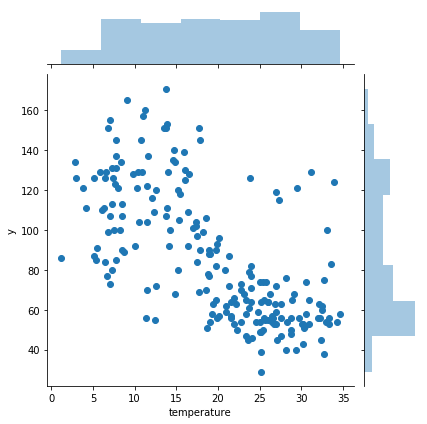

In [18]:
sns.jointplot('temperature', 'y', data=train_df)

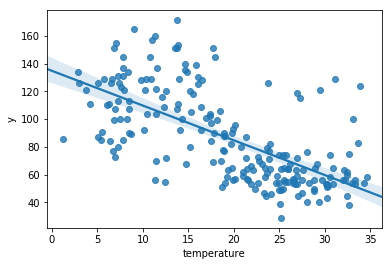

In [19]:
sns.regplot('temperature', 'y', data=train_df)

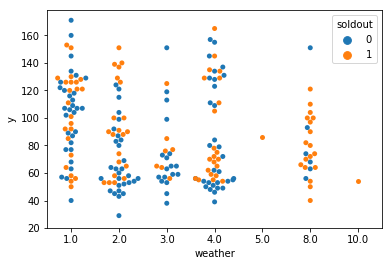

In [20]:
sns.swarmplot('weather', 'y', hue="soldout", data=train_df)

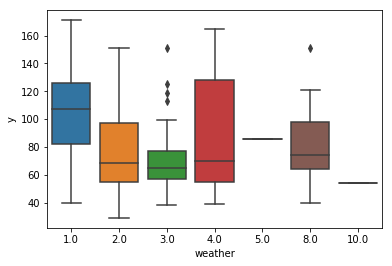

In [21]:
sns.boxplot('weather', 'y', data=train_df)

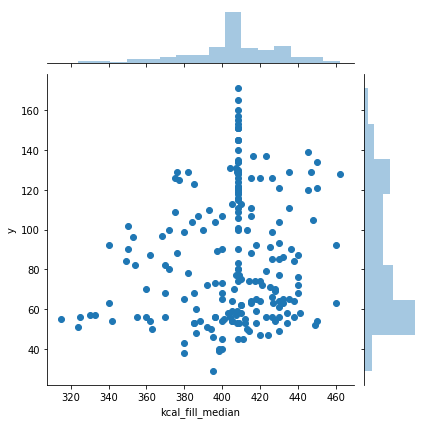

In [22]:
sns.jointplot('kcal_fill_median', 'y', data=train_df)

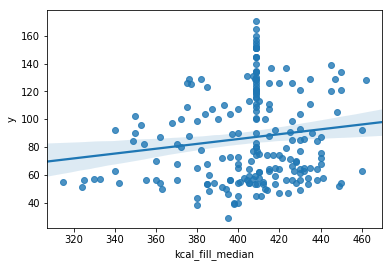

In [23]:
sns.regplot('kcal_fill_median', 'y', data=train_df)

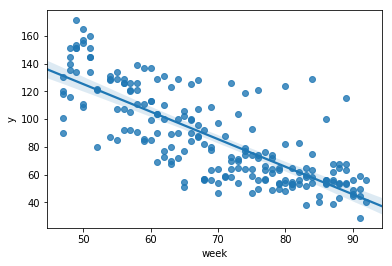

In [24]:
sns.regplot('week', 'y', data=train_df)

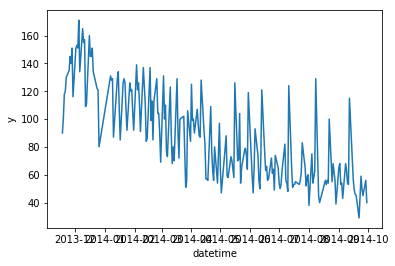

In [25]:
#sns.set(style="whitegrid")

#rs = np.random.RandomState(365)
#values = rs.randn(365, 4).cumsum(axis=0)
#dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame()
data['y'] = train_df['y']
data['datetime'] = train_df['datetime']
#data = data.rolling(7).mean()

sns.lineplot(x="datetime", y="y", data=data) # , palette="tab10",, linewidth=1.5

In [26]:
data_roll5 = pd.DataFrame()
data_roll5['datetime'] = train_df['datetime']
data_roll5['y'] = train_df['y']
data_roll5 = data_roll5.set_index(['datetime'])
data_roll5 = data_roll5.rolling(5, center=True).mean().dropna()
data_roll5 = data_roll5.reset_index()
data_roll5.head(5)

,datetime,y
0,2013-11-20,111.8
1,2013-11-21,120.8
2,2013-11-22,129.6
3,2013-11-25,134.0
4,2013-11-26,140.2


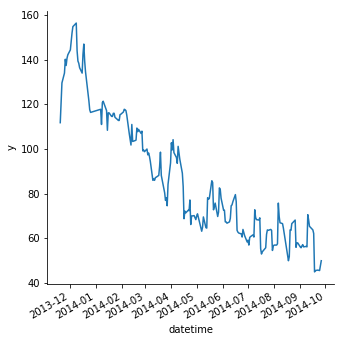

In [27]:
g = sns.relplot(x="datetime", y="y", data=data_roll5, kind="line") # , palette="tab10",, linewidth=1.5
g.fig.autofmt_xdate()

In [28]:
#データを対前日比の株価変動率に変換しdfpctに格納
dfpct = train_df['y'].pct_change().dropna() * 100
dfpct

1       12.222222
2       16.831683
3        1.694915
4        8.333333
5        3.846154
6        7.407407
7       -3.448276
8        7.857143
9      -23.178808
10      30.172414
11       1.324503
12      -1.307190
13      13.245033
14     -21.637427
15      23.134328
16      -6.060606
17       1.290323
18     -30.573248
19       1.834862
20      44.144144
21      -9.375000
22       0.000000
23       4.137931
24     -11.258278
25      -8.955224
26      -0.819672
27     -33.884298
28      63.750000
29      -2.290076
30       0.781250
          ...    
177     40.000000
178     -5.357143
179      5.660377
180     -3.571429
181     85.185185
182    -45.000000
183     23.636364
184     -8.823529
185     -9.677419
186    -30.357143
187     66.666667
188      4.615385
189    -22.058824
190      1.886792
191    -20.370370
192     58.139535
193     -7.352941
194    -14.285714
195     -1.851852
196    116.981132
197    -51.304348
198    -12.500000
199     -6.122449
200     -2.173913
201    -35

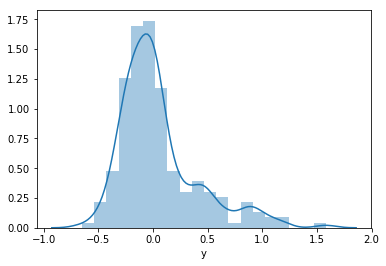

In [29]:
pct_chg = train_df['y'].pct_change().dropna()
sns.distplot(pct_chg)
#pct_chg

In [30]:
pct_chg.describe()

count    206.000000
mean       0.048120
std        0.359655
min       -0.651163
25%       -0.198450
50%       -0.023078
75%        0.141548
max        1.583333
Name: y, dtype: float64

In [31]:
train_df[pd.notna(train_df["remarks"])]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean,year,month,day,dayofweek
40,2014-01-24,92,56,1,鶏のレモンペッパー焼orカレー,418.0,鶏のレモンペッパー焼（50食）、カレー（42食）,NaN,0.0,1.0,0.0,10.1,418.0,418.000000,2014,1,24,4
59,2014-02-21,113,60,0,酢豚orカレー,410.0,酢豚（28食）、カレー（85食）,ママの会,0.0,1.0,0.0,8.5,410.0,410.000000,2014,2,21,4
83,2014-03-28,106,65,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,1.0,0.0,18.5,408.5,404.409639,2014,3,28,4
93,2014-04-11,128,67,1,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,1.0,0.0,16.5,408.5,404.409639,2014,4,11,4
103,2014-04-25,80,69,0,中華丼,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,20.8,408.5,404.409639,2014,4,25,4
115,2014-05-16,126,72,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,1.0,0.0,23.8,408.5,404.409639,2014,5,16,4
119,2014-05-22,54,73,1,サーモンのムニエル2色ソース,428.0,料理長のこだわりメニュー,NaN,0.0,10.0,0.0,19.0,428.0,428.000000,2014,5,22,3
125,2014-05-30,119,74,0,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,3.0,0.0,26.9,408.5,404.409639,2014,5,30,4
135,2014-06-13,121,76,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,29.5,408.5,404.409639,2014,6,13,4
138,2014-06-18,66,77,1,ビーフストロガノフ,426.0,料理長のこだわりメニュー,NaN,0.0,8.0,0.0,21.9,426.0,426.000000,2014,6,18,2


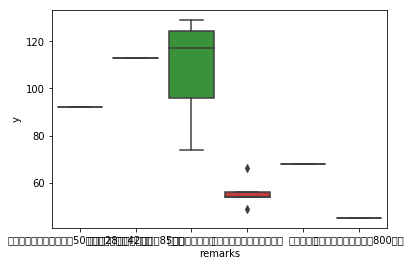

In [33]:
sns.boxplot('remarks', 'y', data=train_df[pd.notna(train_df["remarks"])])

In [32]:
train_df[train_df["remarks"]=="お楽しみメニュー"]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_fill_median,kcal_fill_mean,year,month,day,dayofweek
83,2014-03-28,106,65,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,1.0,0.0,18.5,408.5,404.409639,2014,3,28,4
93,2014-04-11,128,67,1,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,1.0,0.0,16.5,408.5,404.409639,2014,4,11,4
103,2014-04-25,80,69,0,中華丼,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,20.8,408.5,404.409639,2014,4,25,4
115,2014-05-16,126,72,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,1.0,0.0,23.8,408.5,404.409639,2014,5,16,4
125,2014-05-30,119,74,0,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,3.0,0.0,26.9,408.5,404.409639,2014,5,30,4
135,2014-06-13,121,76,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,29.5,408.5,404.409639,2014,6,13,4
145,2014-06-27,74,78,0,牛丼,NaN,お楽しみメニュー,NaN,0.0,8.0,0.0,25.4,408.5,404.409639,2014,6,27,4
155,2014-07-11,124,80,0,ポークカレー,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,33.9,408.5,404.409639,2014,7,11,4
164,2014-07-25,83,82,0,ひやしたぬきうどん・炊き込みご飯,NaN,お楽しみメニュー,NaN,0.0,2.0,0.0,33.6,408.5,404.409639,2014,7,25,4
174,2014-08-08,129,84,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,4.0,0.0,31.1,408.5,404.409639,2014,8,8,4


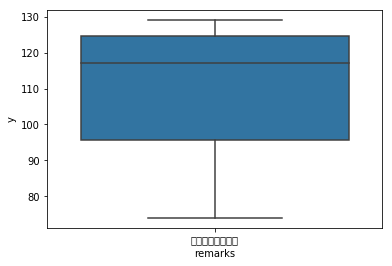

In [35]:
sns.boxplot('remarks', 'y', data=train_df[train_df["remarks"]=="お楽しみメニュー"])

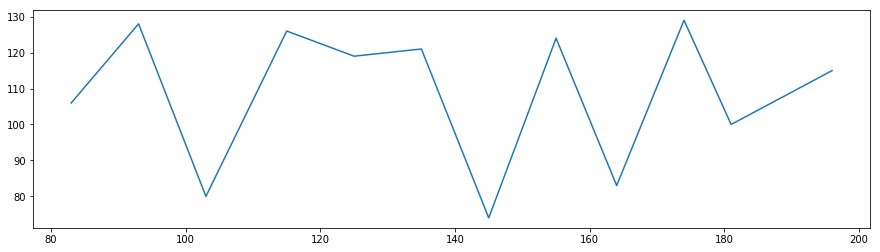

In [37]:
train_df[train_df["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))

In [ ]:
train_df['remarks'] = train_df['remarks'].fillna(0.0).apply(lambda x: 1.0 if x != 0.0 else 0.0)
sns.swarmplot('remarks', 'y', data=train_df)

In [ ]:
train_df[pd.notna(train_df["event"])]

In [ ]:
sns.boxplot('event', 'y', data=train_df[pd.notna(train_df["event"])])

In [ ]:
train_df['event'] = train_df['event'].fillna(0.0).apply(lambda x: 1.0 if x != 0.0 else 0.0)
sns.swarmplot('event', 'y', data=train_df)

In [ ]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train_df[train_df["event"]==1]["y"],train_df[train_df["event"]==0]["y"])
print("p",p,"stat",stat)

In [ ]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train_df[train_df["remarks"]==1]["y"],train_df[train_df["remarks"]==0]["y"])
print("p",p,"stat",stat)

In [ ]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train_df[train_df["dayofweek"]==1]["y"],train_df[train_df["dayofweek"]==0]["y"])
print("p",p,"stat",stat)

In [ ]:
from scipy.stats import median_test
stat,p,med,tbl = median_test(train_df[train_df["soldout"]==1]["y"],train_df[train_df["soldout"]==0]["y"])
print("p",p,"stat",stat)

In [ ]:
data = pd.DataFrame()
data['y'] = train_df['y']
data['datetime'] = train_df['datetime']
data['event'] = train_df['event']
sns.lineplot(x="datetime", y="y", hue="event", data=data) # , palette="tab10",, linewidth=1.5

In [ ]:
data = pd.DataFrame()
data['y'] = train_df['y']
data['datetime'] = train_df['datetime']
data['remarks'] = train_df['remarks']
sns.lineplot(x="datetime", y="y", hue="remarks", data=data) # , palette="tab10",, linewidth=1.5